# Zápočtový program EVO 1

Jako zápočtový program jsem implementoval některé evolucí motivované algoritmy pro spojitou optimalizaci více učelových funkcí s omezujícími podmínkami.
Pro testování implementovaných algoritmů jsem použil knihovnu [pymoo](https://pymoo.org/).

**Implementované algoritmy**:
1. Diferenciální evoluce
2. Evoluční strategie s adaptivními operátory
3. Non-dominated Sorting Genetic Algorithm II

**Problémy a jejich řešení**:
1. Omezující podmínky: všechny algoritmy pracují i s nepřípustnými řešeními, aby byla zajištěna diverzita populace, obecně ale preferují řešení přípustná
2. Více účelových funkční: hledáme tzv. pareto optimální řešení, tj. taková, které pareto dominují všechna ostatní, tedy jsou ve všech ÚF alespoň tak dobrá a v nějaké lepší

**Experimenty**
- Pro experimenty využívám problémy z knihovny [pymoo](https://pymoo.org/)
- Výslekdy jednotlivých algoritmů porovnávám s množinou pareto optimálních řešení, která je u některéch problémů dostupná
- Zároveň používám tyto metriky pro porovnání algoritmů
    - **GD**: průměrná vzdálenost jedinců od pareto optimálních řešení, čím nižší, tím lepší
    - **IGD**: průměrná vzdálenost pareto optimálních řešení od jedinců, čím nižší, tím lepší
    - **Spread**: standartní odchylka od průměrné vzdálenosti, rozptýlenost populace, čím nižší, tím lepší

In [1]:
from pymoo.problems import get_problem
from differential_evolution import  differential_evolution_feasible
from evolutionary_strategies import evolutionary_strategies_feasible
from nsga2 import nsga2_feasible
from experiments import plot_pareto_front, print_quality_metrics

## Experiment [BNH](https://pymoo.org/problems/multi/bnh.html)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 2                 | 2         | 2                 |

Na tomto jednoduchém problému fungují všechny algoritmy podobně dobře a najdou dostatek pareto otpmálních řešení.
Nejlépe se daří diferenciální evoluci, NSGA2 dobře pokrývá celý rozsah pareto optimálních řešení.

---- Quality Metrics for bnh ----
DE       | #:  100 | GD: 0.3978 | IGD: 2.1221 | Spread: 1.6425
ES       | #:   50 | GD: 0.4221 | IGD: 2.7076 | Spread: 4.9232
NSGA-II  | #:   50 | GD: 0.3967 | IGD: 1.1139 | Spread: 2.1039


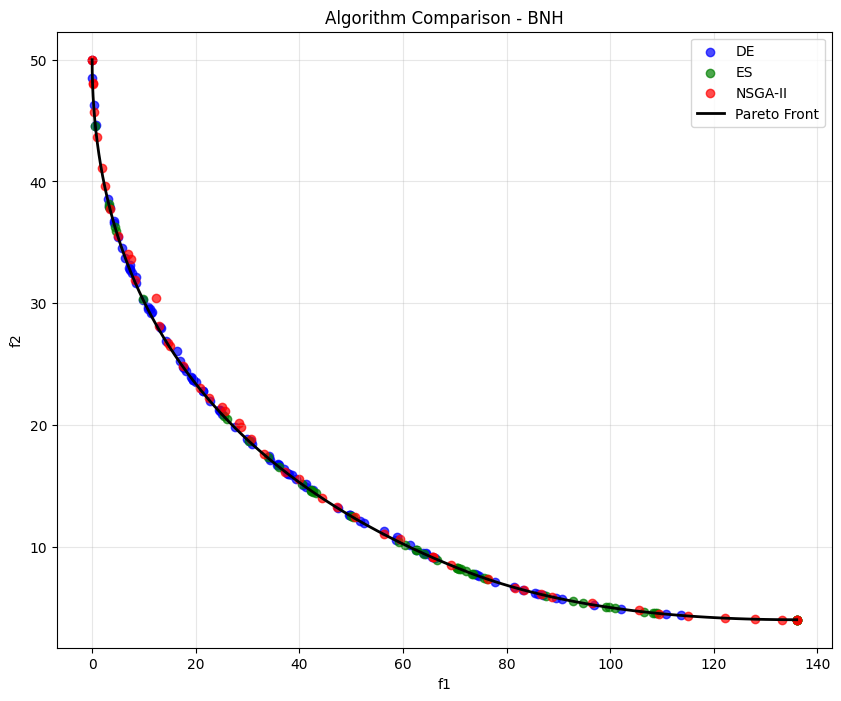

In [6]:
problem_name = 'bnh'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=100, generations=500)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=50, generations=100)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=100)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [OSY](https://pymoo.org/problems/multi/osy.html)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 6                 | 2         | 6                 |

V tomto exprimentu se opět ukazuje, že NSGA2 nejlépe pokrývá téměř celou množinu PO řešení.
Naopak řešení DE i ES jsou koncentrovaná jen v určitých místech, pravděpodobně kvůli nedostatečné diverzitě populace.

---- Quality Metrics for osy ----
DE       | #:  100 | GD: 2.6565 | IGD: 19.0873 | Spread: 3.5352
ES       | #:  100 | GD: 2.4140 | IGD: 13.4947 | Spread: 4.3400
NSGA-II  | #:  100 | GD: 3.5560 | IGD: 6.1517 | Spread: 3.6596


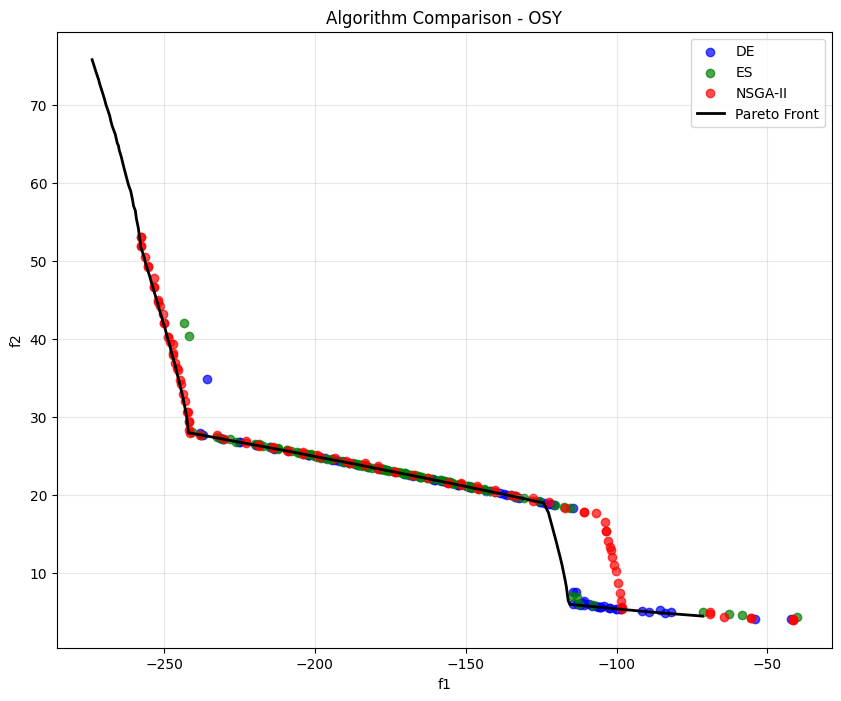

In [8]:
problem_name = 'osy'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=100, generations=1000)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=500)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=100, generations=500)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT1](https://pymoo.org/problems/multi/zdt.html#ZDT1)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 0                 |

V tomto experimentu nejsou dány žádné omezující podmínky, pouze intervaly hodnot proměnných.
Množina PO řešení je navíc konvexní.

Na tomto exprimentu s relativně mnoha proměnými vidíme, že NSGA2 přímo určený pro více-kriteriální optimalizaci najde a pokryje PO řešení velmi rychle a efektivně.
I diferenciální evoluce byla schopna se po dostatečném počtu generací a jedinců a PO řešením dobře přiblížit.
Naopak evoluční strategie selhaly, možná kvůli nedostatečné přesnosti.

---- Quality Metrics for zdt1 ----
DE       | #:  200 | GD: 0.0420 | IGD: 0.0685 | Spread: 0.0142
ES       | #:  200 | GD: 0.4815 | IGD: 0.3506 | Spread: 0.0514
NSGA-II  | #:   50 | GD: 0.0047 | IGD: 0.0138 | Spread: 0.0276


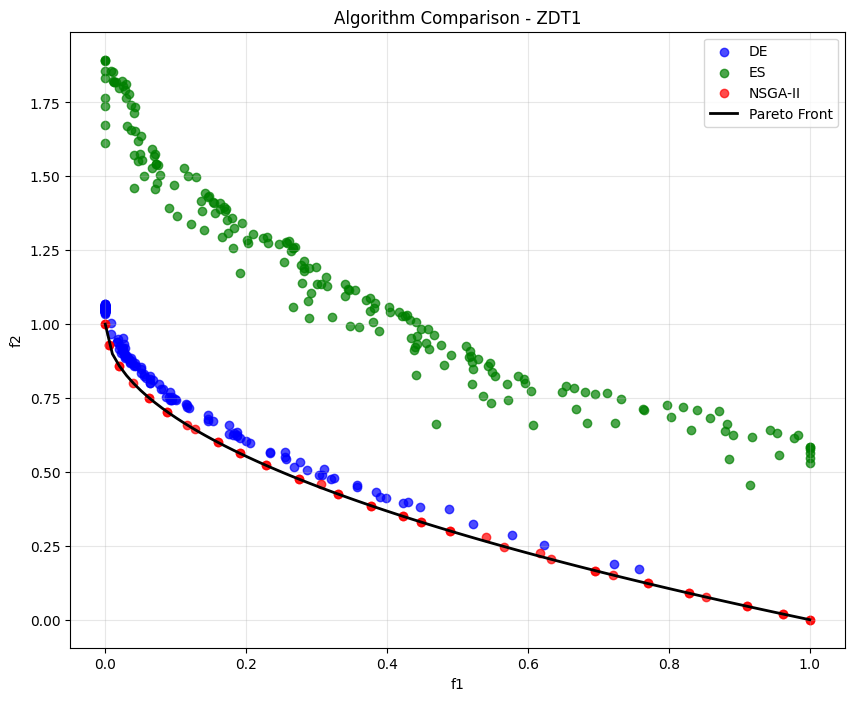

In [ ]:
problem_name = 'zdt1'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=200, generations=1000, sigma_range_fac=0.02, center_bias=0.05, verbose=True)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=200)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT2](https://pymoo.org/problems/multi/zdt.html#ZDT2)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 0                 |

V tomto experimentu nejsou dány žádné omezující podmínky, pouze intervaly hodnot proměnných.
Množina PO řešení je tentokrát nekonvexní.

V tomto experimentu vidíme, že DE zkonvergovala do jednoho, pravděpodobně lokálního optima.
Evoluční strategie měly opět problém dosáhnout dostatečné přesnoti, ale našli dostatek přípustných řešení.
Nejlepší výsledky opět poskytl NSGA2.

---- Quality Metrics for zdt2 ----
DE       | #:  200 | GD: 0.0000 | IGD: 0.6105 | Spread: 0.0000
ES       | #:  100 | GD: 0.5943 | IGD: 0.5405 | Spread: 0.0352
NSGA-II  | #:   50 | GD: 0.0045 | IGD: 0.0136 | Spread: 0.0273


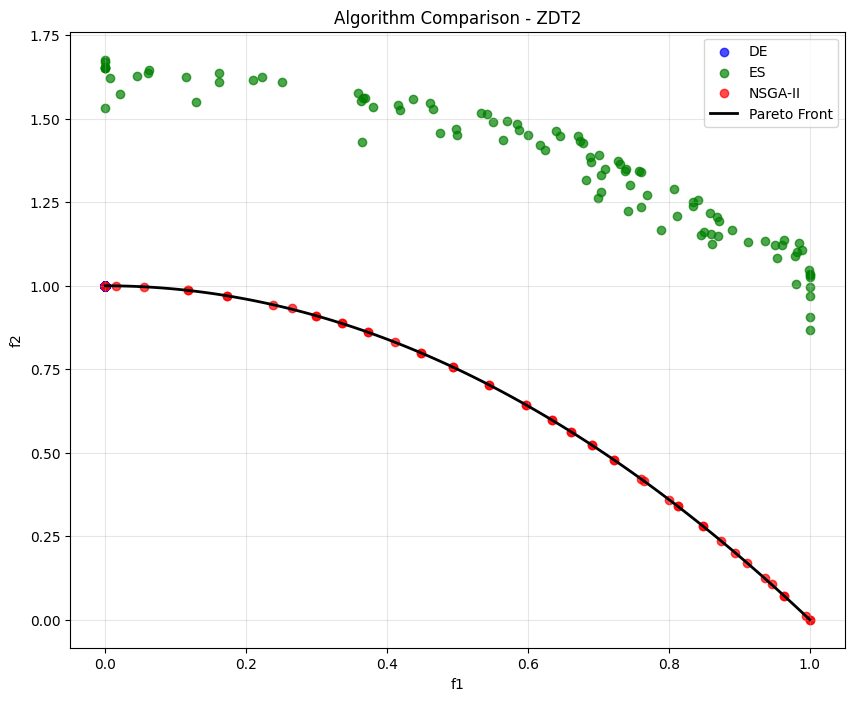

In [9]:
problem_name = 'zdt2'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.5)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=200)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [ZDT3](https://pymoo.org/problems/multi/zdt.html#ZDT3)
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 0                 |

V tomto experimentu nejsou dány žádné omezující podmínky, pouze intervaly hodnot proměnných.
Množina PO řešení je tentokrát nespojitá.


---- Quality Metrics for zdt3 ----
DE       | #:  200 | GD: 0.0020 | IGD: 0.0203 | Spread: 0.0327
ES       | #:  100 | GD: 0.3183 | IGD: 0.2735 | Spread: 0.0402
NSGA-II  | #:   50 | GD: 0.0053 | IGD: 0.0243 | Spread: 0.0579


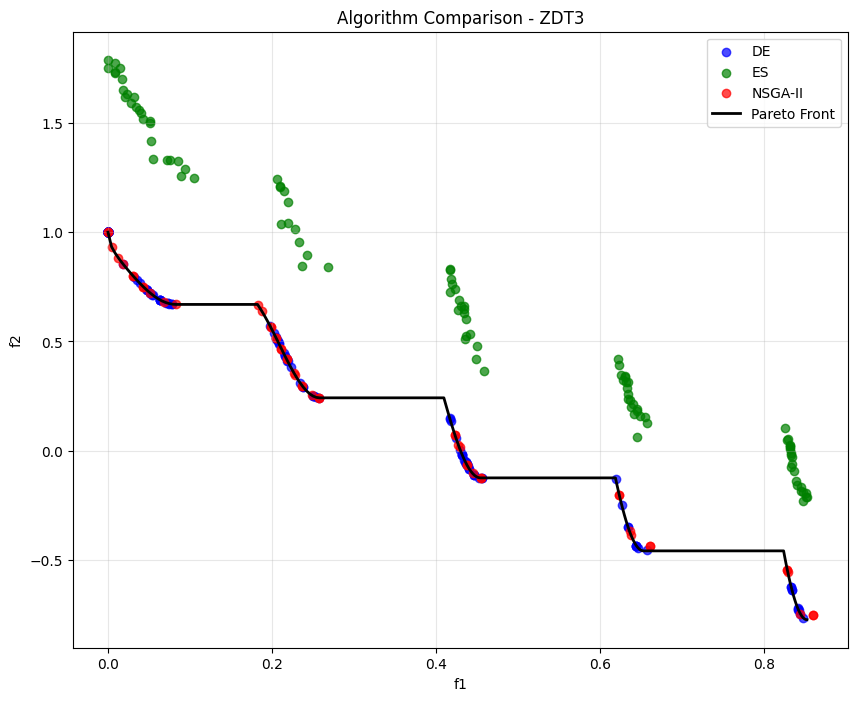

In [11]:
problem_name = 'zdt3'
problem = get_problem(problem_name)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.5)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=100, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=50, generations=200)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)

## Experiment [DAS-CMOP 1](https://pymoo.org/problems/constrained/dascmop.html#DAS-CMOP1-(1))
| Počet proměnných  | Počet ÚF  | Počet podmínek    |
|------------------ |---------- |----------------   |
| 30                | 2         | 11                |

V tomto problému všechny algoritmy zkonvergovali do nějakých lokálních optim. Nejlépe množinu PO řešení pokryla DE. Všechny algoritmy ale úspěšně nalezli dostatek řešení.

---- Quality Metrics for dascmop1 ----
DE       | #:  200 | GD: 0.0028 | IGD: 0.3828 | Spread: 0.0109
ES       | #:  200 | GD: 0.0008 | IGD: 0.3701 | Spread: 0.0002
NSGA-II  | #:  100 | GD: 0.0007 | IGD: 0.3847 | Spread: 0.0008


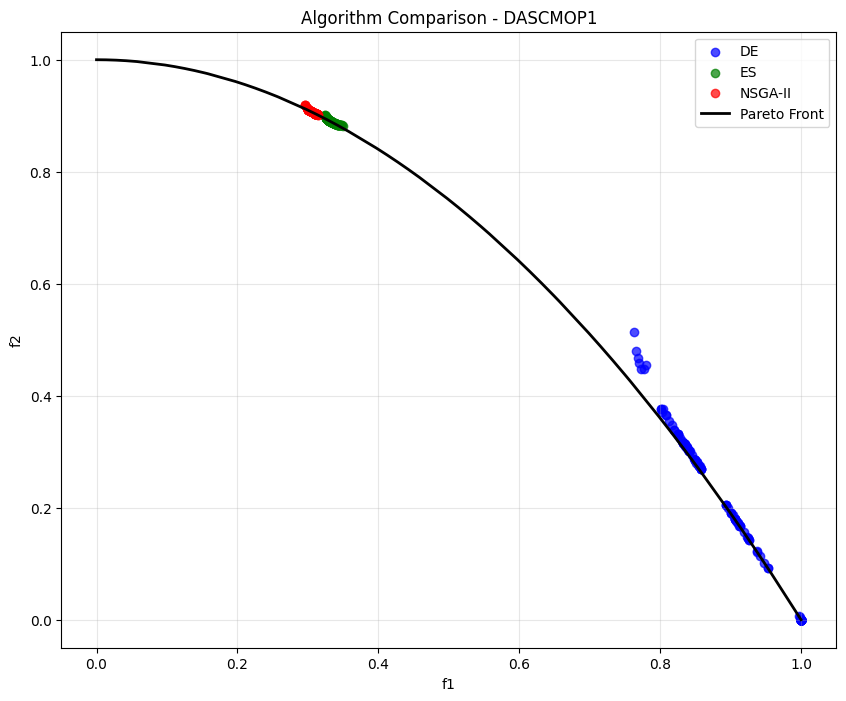

In [12]:
problem_name = 'dascmop1'
difficulty = 1
problem = get_problem(problem_name, difficulty)
de_pop, de_fit = differential_evolution_feasible(problem, pop_size=200, generations=1000, F=0.5)
es_pop, es_fit = evolutionary_strategies_feasible(problem, pop_size=200, generations=1000, sigma_range_fac=0.02, center_bias=0.05)
nsga2_pop, nsga2_fit = nsga2_feasible(problem, pop_size=100, generations=500)

print_quality_metrics(problem, problem_name, de_fit, es_fit, nsga2_fit)
plot_pareto_front(problem, problem_name, de_fit, es_fit, nsga2_fit)